In [45]:
import pandas as pd


In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns
plt.style.use("seaborn-whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [48]:
ds_salary = pd.read_csv('ds_salary_2021_2023(2).csv', sep=';')


In [49]:
ds_salary_sem_duplicatas = ds_salary.drop_duplicates()


In [50]:
ds_salary = ds_salary.dropna()


In [51]:
print(ds_salary)

      work_year experience_level employment_type                  job_title  \
0          2023               EN              FT          Applied Scientist   
1          2023               EN              FT          Applied Scientist   
2          2023               EN              FT       Data Quality Analyst   
3          2023               EN              FT    Compliance Data Analyst   
4          2023               EN              FT          Applied Scientist   
...         ...              ...             ...                        ...   
3756       2020               SE              FT   Principal Data Scientist   
3757       2020               SE              FT             Data Scientist   
3758       2020               SE              FT       Data Science Manager   
3759       2020               SE              FT  Machine Learning Engineer   
3760       2020               SE              FT             Data Scientist   

      salary salary_currency  salary_in_usd company

In [52]:
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [53]:
contagem_cientista_dados = ds_salary['job_title'].value_counts().get("Data Scientist", 0)
print(contagem_cientista_dados)


840


In [54]:
contagem_engenheiro_dados = ds_salary['job_title'].value_counts().get("Data Engineer", 0)
print(contagem_engenheiro_dados)

1040


In [55]:
contagem_analista_dados = ds_salary['job_title'].value_counts().get("Data Analyst", 0)
print(contagem_analista_dados)

614


In [56]:
grupo_profissao = ds_salary.groupby('job_title')


In [57]:
media_salario_por_profissao = grupo_profissao['salary'].mean()


In [58]:
media_cientista_dados = media_salario_por_profissao.get("Data Scientist", 0)
media_engenheiro_dados = media_salario_por_profissao.get("Data Engineer", 0)
media_analista_dados= media_salario_por_profissao.get("Data Analyst", 0)

In [59]:
print(f'Média de salário para Cientista de Dados: {media_cientista_dados}')
print(f'Média de salário para Engenheiro de Dados: {media_engenheiro_dados}')
print(f'Média de salário para Analista de Dados: {media_analista_dados}')



Média de salário para Cientista de Dados: 239073.47619047618
Média de salário para Engenheiro de Dados: 156574.96346153846
Média de salário para Analista de Dados: 116306.8664495114


In [60]:
media_cientista_dados_formatada = round(media_cientista_dados, 2)
media_engenheiro_ddados_formatada = round(media_engenheiro_dados, 2)
media_analista_dados_formatada = round(media_analista_dados, 2)

In [61]:
sns.set_theme(style="darkgrid")


In [62]:
medias = [media_cientista_dados, media_engenheiro_dados, media_analista_dados]


In [63]:
profissoes = ["Cientista de Dados", "Engenheiro de Dados", "Analista de Dados"]


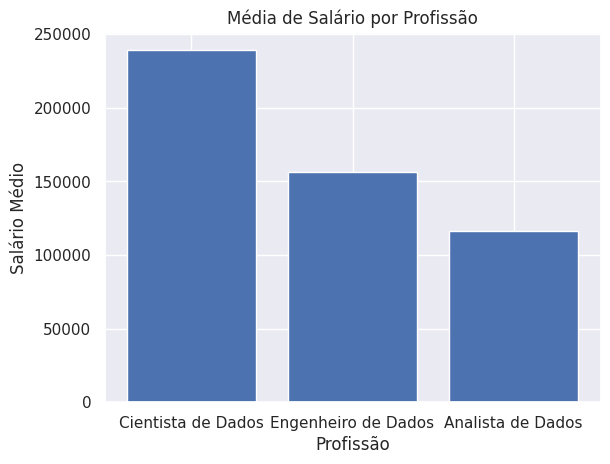

In [64]:
plt.bar(profissoes, medias)
plt.xlabel('Profissão')
plt.ylabel('Salário Médio')
plt.title('Média de Salário por Profissão')

plt.show()


In [65]:
paises = ds_salary['company_location'].unique()
print(paises)

['US' 'NG' 'IN' 'CA' 'ES' 'GH' 'DE' 'CH' 'AU' 'SE' 'BR' 'GB' 'VN' 'BA'
 'GR' 'HK' 'NL' 'FI' 'IE' 'SG' 'SI' 'MX' 'FR' 'HR' 'AM' 'KE' 'RO' 'TH'
 'CF' 'UA' 'IL' 'CO' 'PT' 'EE' 'LV' 'MK' 'PK' 'IT' 'MA' 'AR' 'CR' 'IR'
 'HU' 'AS' 'BE' 'AT' 'ID' 'LU' 'MY' 'CZ' 'DZ' 'RU' 'PL' 'LT' 'TR' 'BO'
 'EG' 'AL' 'SK' 'PR' 'AE' 'DK' 'IQ' 'CN' 'BS' 'JP' 'CL' 'MD' 'MT' 'PH'
 'HN' 'NZ']


In [66]:
cientistas_de_dados = ds_salary.loc[ds_salary['job_title'] == 'Data Scientist']


In [67]:
contagem_por_pais = cientistas_de_dados.groupby('company_location').size().reset_index(name='Quantidade de Cientistas de Dados')
print(contagem_por_pais)


   company_location  Quantidade de Cientistas de Dados
0                AT                                  2
1                AU                                  2
2                BE                                  2
3                BR                                  4
4                CA                                 21
5                CH                                  2
6                CL                                  1
7                DE                                 14
8                DZ                                  1
9                EE                                  1
10               ES                                 28
11               FR                                 15
12               GB                                 31
13               HK                                  1
14               HU                                  2
15               ID                                  1
16               IE                                  4
17        

In [77]:
contagem_por_pais = contagem_por_pais.sort_values(by='Quantidade de Cientistas de Dados', ascending=False)
top_4_paises = contagem_por_pais.head(4)


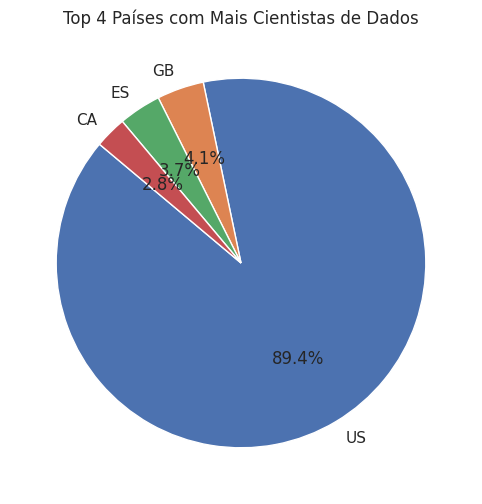

In [79]:
plt.figure(figsize=(10, 6))
plt.pie(top_4_paises['Quantidade de Cientistas de Dados'], labels=top_4_paises['company_location'], autopct='%1.1f%%', startangle=140)
plt.title('Top 4 Países com Mais Cientistas de Dados')
plt.show()

In [70]:
cientistas_de_dados = ds_salary.loc[ds_salary['job_title'] == 'Data Scientist']


In [71]:
agrupacao_por_nivel = cientistas_de_dados.groupby('experience_level').size().reset_index(name='Quantidade')


In [72]:
agrupacao_por_nivel['job_title'] = 'Data Scientist'

print(agrupacao_por_nivel)

  experience_level  Quantidade       job_title
0               EN          59  Data Scientist
1               EX          12  Data Scientist
2               MI         161  Data Scientist
3               SE         608  Data Scientist


In [73]:
cientistas_de_dados = ds_salary.loc[ds_salary['job_title'] == 'Data Scientist']


In [74]:
contagem_por_nivel = cientistas_de_dados['experience_level'].value_counts().reset_index()


In [75]:
contagem_por_nivel.columns = ['Nível de Experiência', 'Quantidade']


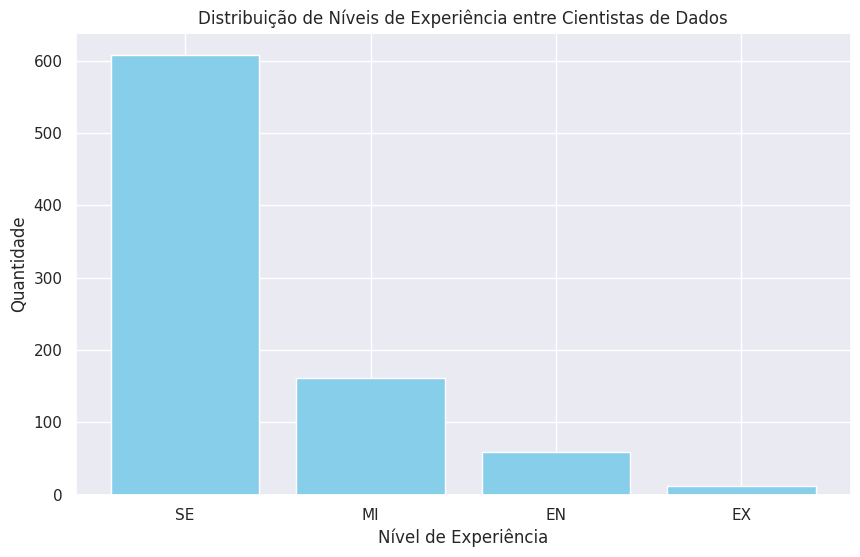

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(contagem_por_nivel['Nível de Experiência'], contagem_por_nivel['Quantidade'], color='skyblue')
plt.xlabel('Nível de Experiência')
plt.ylabel('Quantidade')
plt.title('Distribuição de Níveis de Experiência entre Cientistas de Dados')
plt.show()